### Splitting datasets


In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = {
    'massa': np.arange(100),
    'harga' : np.arange(100)
}
df = pd.DataFrame(data)
df

,massa,harga
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
95,95,95
96,96,96
97,97,97
98,98,98


In [3]:
# splitting manual %training & % testing
dataTrain =  df.iloc[:81]
dataTrain.tail(2)
dataTest = df.iloc[81:]
dataTest.tail(2)

,massa,harga
98,98,98
99,99,99


In [4]:
massaTrain = dataTrain['massa']
hargaTrain = dataTrain['harga']
massaTest = dataTest['massa']
hargaTest = dataTest['harga']



In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(
         (np.array(massaTrain.tolist())).reshape(-1,1),
    hargaTrain
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# splitting data dengan sklearn: train_test_split
from sklearn.model_selection import train_test_split

In [7]:
xtr,xts,ytr,yts = train_test_split(df[['massa']],df['harga'],test_size=.15)
# len(np.array(a.tolist())) # = Massa 75 = 75/100 = 75% = x_train
# len(np.array(b.tolist())) # = massa 25 = 25% = x_test
# len(np.array(c.tolist())) # = harga 75% = y_train
# len(np.array(d.tolist())) # = harga 25% = y_train
xtr

,massa
24,24
7,7
75,75
50,50
79,79
...,...
70,70
25,25
35,35
53,53


In [8]:
model = LinearRegression()
model.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(model.predict(xts))
print(yts)
print(model.score(xts,yts))

[83. 37. 44. 29. 89.  5. 36. 94. 40. 47. 80. 93. 46. 33. 60.]
83    83
37    37
44    44
29    29
89    89
5      5
36    36
94    94
40    40
47    47
80    80
93    93
46    46
33    33
60    60
Name: harga, dtype: int32
1.0


<hr>

In [10]:
from sklearn.datasets import load_boston

In [11]:
data1 = load_boston()
dir(data1)
# data1['target']
# data1['data']
# data1['DESCR']
# data1['filename']
# data1['feature_names']



['DESCR', 'data', 'feature_names', 'filename', 'target']

In [12]:
dfx = pd.DataFrame(data1['data'],columns=data1['feature_names'])
dfy = pd.DataFrame(data1['target'],columns=['harga'])

# sb.heatmap(df1.corr(),annot=True)

In [25]:
from sklearn import preprocessing
dfxS = pd.DataFrame(preprocessing.scale(dfx),columns=data1['feature_names'])
dfxS ['harga'] = dfy
# dfy


In [18]:
# splitting 90% training, 10% testing
x = dfxS[['RM','PTRATIO','LSTAT']]
y = dfxS['harga']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=.1
)
print(x_train.iloc[0])
print(y_train.iloc[0])

RM        -0.043644
PTRATIO   -0.303094
LSTAT     -0.308812
Name: 114, dtype: float64
18.5


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(model.predict([x_test.iloc[0]]))

[26.95833277]


In [20]:
hargaPred = model.predict(x_test)
harga = y_test

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(harga,hargaPred)
rmse = np.sqrt(mse)
rmse

5.016771791745523

In [22]:
r2 = r2_score(harga,hargaPred)
r2

0.7226821014490854

<hr>

In [23]:
from sklearn.datasets import load_iris

In [29]:
i = load_iris()
dir(i)
df = pd.DataFrame(i['data'],columns=['SL','SW','PL','PW'])
df['spesies'] = i['target']
df['namaSp'] = df['spesies'].apply(
    lambda x: i['target_names'][x]
)
df

,SL,SW,PL,PW,spesies,namaSp
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


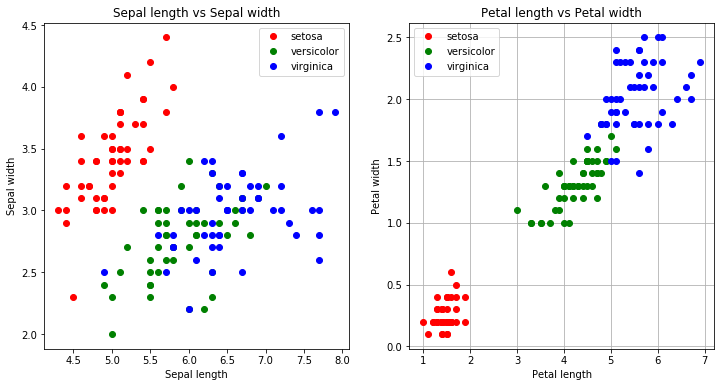

In [32]:
# Plotting
df0 = df[df['spesies'] == 0]
df1 = df[df['spesies'] == 1]
df2 = df[df['spesies'] == 2]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df0['SL'],df0['SW'],'ro')
plt.plot(df1['SL'],df1['SW'],'go')
plt.plot(df2['SL'],df2['SW'],'bo')
plt.title('Sepal length vs Sepal width')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['setosa','versicolor','virginica'])

plt.subplot(122)
plt.plot(df0['PL'],df0['PW'],'ro')
plt.plot(df1['PL'],df1['PW'],'go')
plt.plot(df2['PL'],df2['PW'],'bo')
plt.legend(['setosa','versicolor','virginica'])

plt.title('Petal length vs Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.grid(True)

# plt.supertitle(r '$\mathcal{Iris Dataset}$')

In [34]:
from sklearn.datasets import load_digits
digit = load_digits()
dir(digit)

['DESCR', 'data', 'images', 'target', 'target_names']

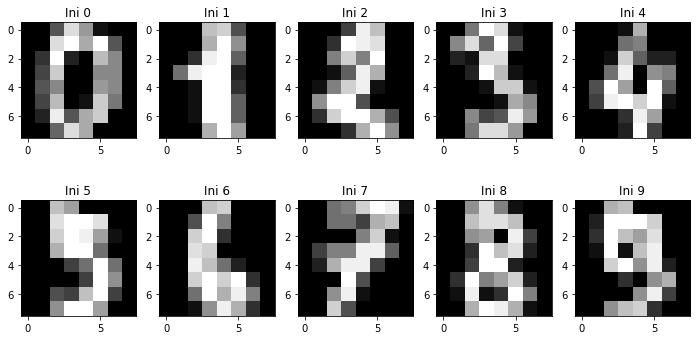

In [36]:
plt.figure(figsize=(12,6))
for i in range (10):
    plt.subplot(2,5,i+1)
    plt.imshow(digit['images'][i],cmap='gray')
    plt.title(f'Ini {digit["target"][i]}')